In [1]:
import os
import string
import pandas as pd
import nltk
from nltk.util import bigrams, ngrams
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler

### Function to read a CSV file and return a DataFrame

In [2]:
def read_csv_file(file_name):
    file_path = os.path.join(datasets_folder, file_name)
    if os.path.isfile(file_path):
        return pd.read_csv(file_path)
    return None

### Function to preprocess text by lowercasing, removing stopwords, and tokenizing

In [3]:
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

### Function to generate and plot n-grams

In [4]:
# Function to generate and plot n-grams
def generate_and_plot_ngrams(df, column_name, n, title):
    df[column_name] = df['preprocessed_text'].apply(lambda x: list(ngrams(x, n)))

    # Count the frequency of n-grams
    ngram_frequency = Counter()
    for ngram_list in df[column_name]:
        ngram_frequency.update(ngram_list)

    # Get the most frequent n-grams while excluding specific terms and punctuation
    exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
    exclude_punctuation = set(string.punctuation)

    most_common_ngrams = [(ngram, freq) for ngram, freq in ngram_frequency.most_common() if all(term not in ngram and all(char not in ngram for char in exclude_punctuation) for term in exclude_terms)][:10]

    # Unzip n-gram and frequency into separate lists and convert n-grams to strings
    ngram, frequency = zip(*most_common_ngrams)
    ngram = [' '.join(n) for n in ngram]

    # Create a chart for the most frequent n-grams
    plt.figure(figsize=(10, 6))
    plt.barh(ngram, frequency)
    plt.xlabel(f'{n}-grams')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

In [5]:
datasets_folder = "../datasets"
file_name = "tupi_hierarchy.csv"
df_tupi_hier = read_csv_file(file_name)

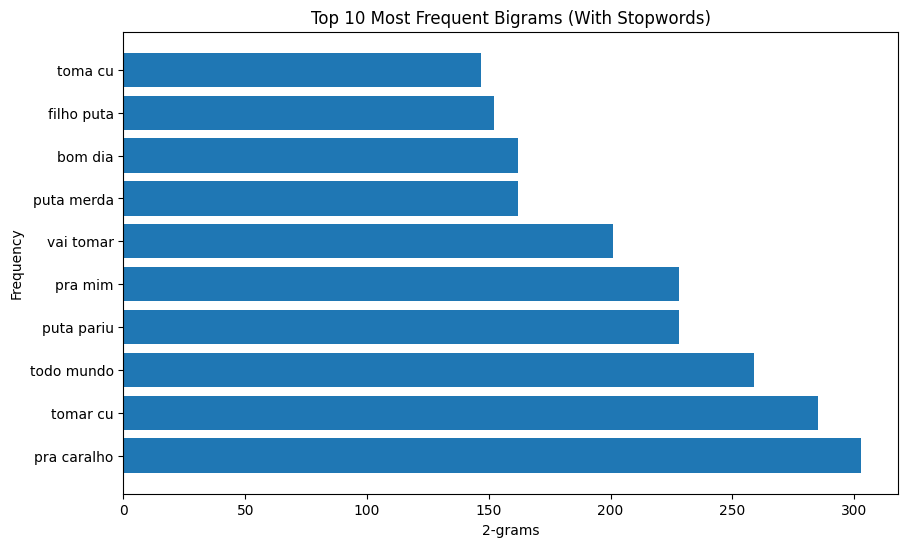

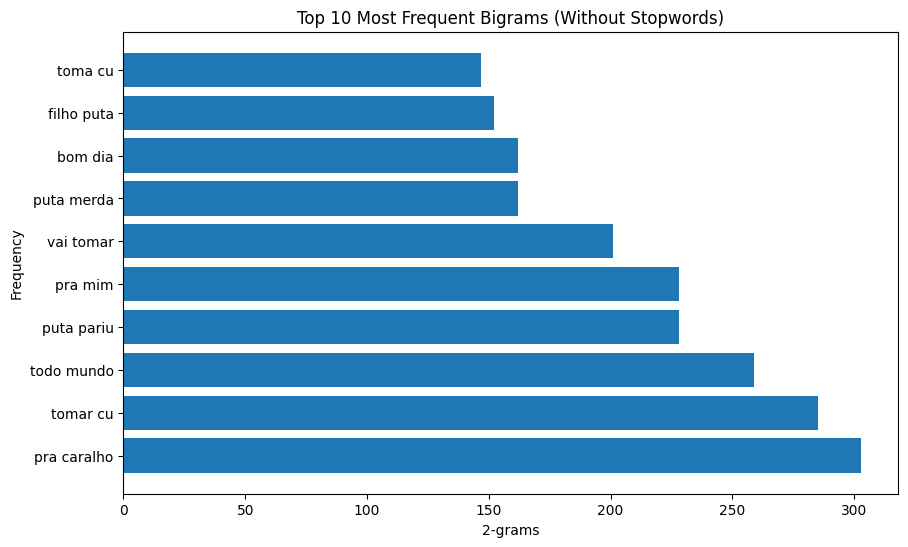

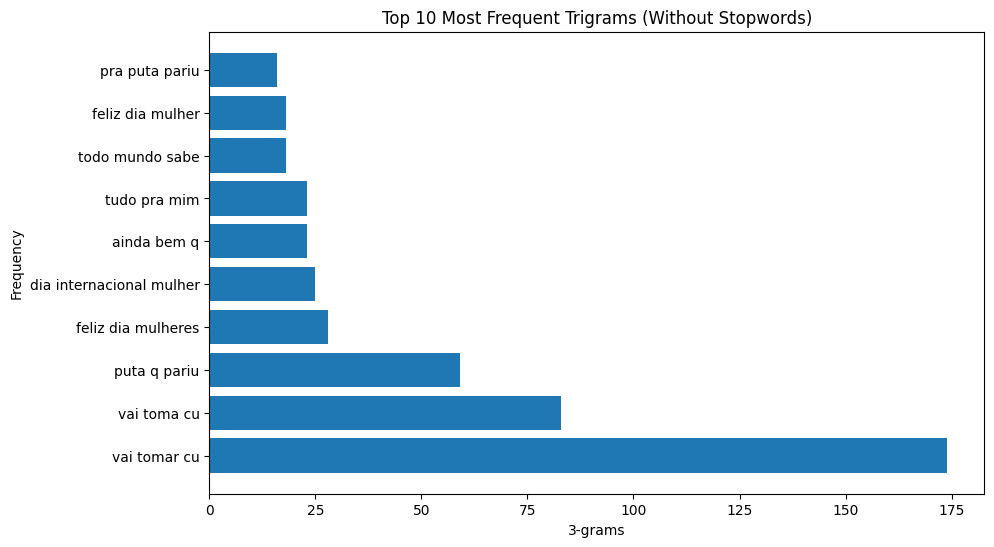

In [6]:
if df_tupi_hier is not None:
    df_tupi_hier['text'] = df_tupi_hier['text'].str.lower()
    df_tupi_hier['preprocessed_text'] = df_tupi_hier['text'].apply(preprocess_text)

    # Generate and plot bigrams with stopwords
    generate_and_plot_ngrams(df_tupi_hier, 'bigrams', 2, 'Top 10 Most Frequent Bigrams (With Stopwords)')

    # Generate and plot bigrams without stopwords
    generate_and_plot_ngrams(df_tupi_hier, 'bigrams', 2, 'Top 10 Most Frequent Bigrams (Without Stopwords)')

    # Generate and plot trigrams without stopwords
    generate_and_plot_ngrams(df_tupi_hier, 'trigrams', 3, 'Top 10 Most Frequent Trigrams (Without Stopwords)')

file_name = "tupi_binary.csv"
df_tupi_binary = read_csv_file(file_name)

In [20]:
# Function to save n-gram plots to a folder
def save_ngram_plots_to_folder(df, column_name, n, title, folder_name):
    df[column_name] = df['preprocessed_text'].apply(lambda x: list(ngrams(x, n)))

    # Count the frequency of n-grams
    ngram_frequency = Counter()
    for ngram_list in df[column_name]:
        ngram_frequency.update(ngram_list)

    # Get the most frequent n-grams while excluding specific terms and punctuation
    exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
    exclude_punctuation = set(string.punctuation)

    most_common_ngrams = [(ngram, freq) for ngram, freq in ngram_frequency.most_common() if all(term not in ngram and all(char not in ngram for char in exclude_punctuation) for term in exclude_terms)][:10]

    # Unzip n-gram and frequency into separate lists and convert n-grams to strings
    ngram = [' '.join(ngram) for ngram, freq in most_common_ngrams]

    # Create a chart for the most frequent n-grams
    plt.figure(figsize=(10, 6))
    plt.barh(ngram, [freq for ngram, freq in most_common_ngrams])  # Use a list comprehension to extract frequencies
    plt.xlabel(f'{n}-grams')
    plt.ylabel('Frequency')
    plt.title(title)

    
    # Create the figures folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Define the file path for saving the plot
    file_path = os.path.join(folder_name, f'{title}.png')

    # Save the plot as an image
    plt.savefig(file_path)


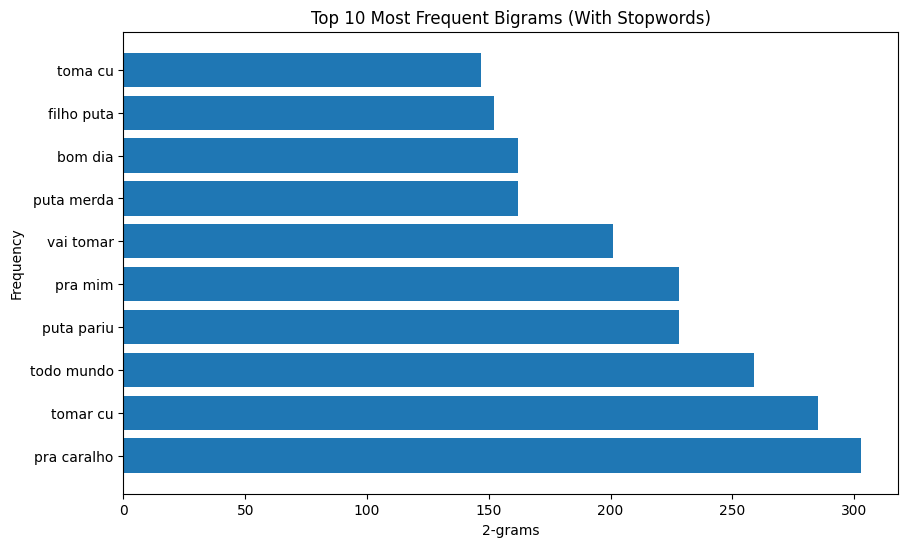

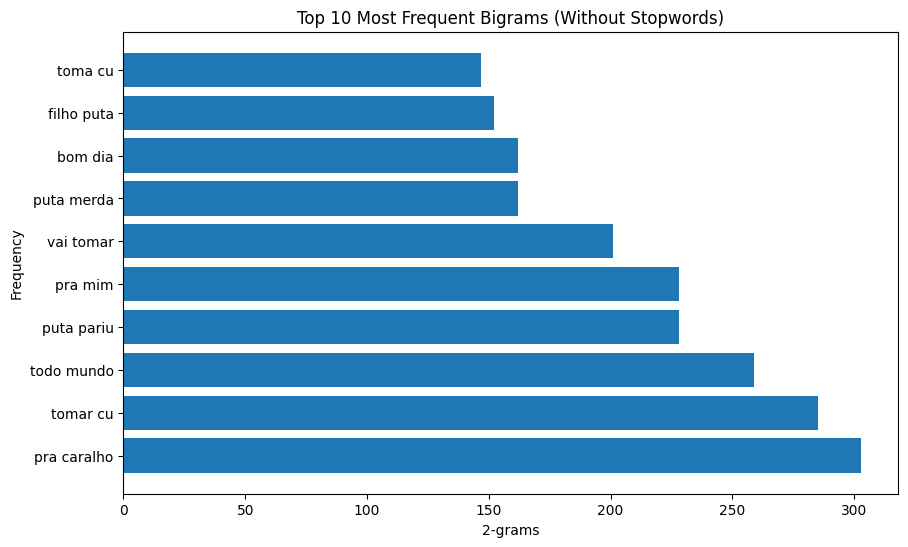

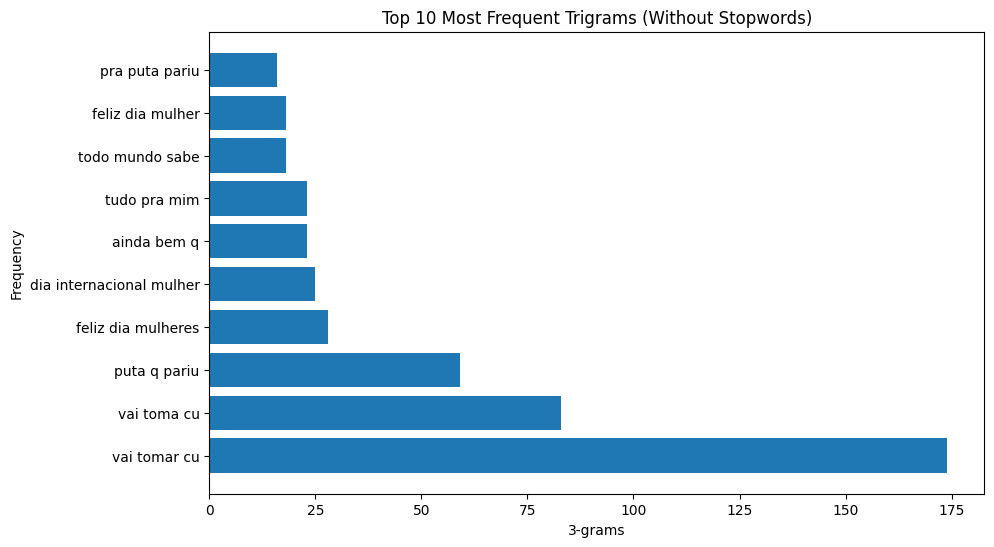

In [22]:
save_ngram_plots_to_folder(df_tupi_hier, 'bigrams', 2, 'Top 10 Most Frequent Bigrams (With Stopwords)', '../figures')
save_ngram_plots_to_folder(df_tupi_hier, 'bigrams', 2, 'Top 10 Most Frequent Bigrams (Without Stopwords)', '../figures')
save_ngram_plots_to_folder(df_tupi_hier, 'trigrams', 3, 'Top 10 Most Frequent Trigrams (Without Stopwords)', '../figures')